# Employee Attrition Problem

#### Problem Statement
> To predict the salary of employee based on the information provided in the dataset

#### Business Aspect
> Mr. Francis who is the Manager of AI Robotics is very disturbed because the employee in his company are leaving the company due to various reasons. To tackle this problem he hires Mr.Andrew who is a Data Scientist and provides him with the dataset 

#### How will the company profit from the problem solution

> Company can understand what factors effects their finance. for example: location, employee experience, education, qualification, etc

> They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, education qualification, etc. that will reduce spending of extra money

> The company can get a rough idea of revenue so that they can allocate an adequate amount for their employee's

In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [3]:
test_data=pd.read_csv(r"C:\VS Code\ML - Pro\test_dataset.csv")

In [4]:
train_data=pd.read_csv(r"C:\VS Code\ML - Pro\train_dataset.csv")

In [5]:
train_salaries=pd.read_csv(r"C:\VS Code\ML - Pro\train_salaries.csv")

In [6]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [8]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [9]:
# Adding salary dataset to train data 
train_data=pd.merge(train_data, train_salaries, on='jobId')

In [10]:
# salaries less than 30 can be removed as such salary per month is not expected
train_data=train_data[train_data['salary']>30]

#### Basic EDA

> Identifying the number of features or columns

In [11]:
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [13]:
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [14]:
train_data.nunique()

jobId                  997548
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    265
dtype: int64

In [15]:
test_data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [16]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [17]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [18]:
# Removing columns jobId and companyId as mostly they have unique values
train_data=train_data.drop(columns=['jobId', 'companyId'])

In [19]:
train_data.shape

(997548, 7)

#### Check for the categorical column in the list

In [20]:
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])  
categorical_list = train_data.select_dtypes(include=['object'])  

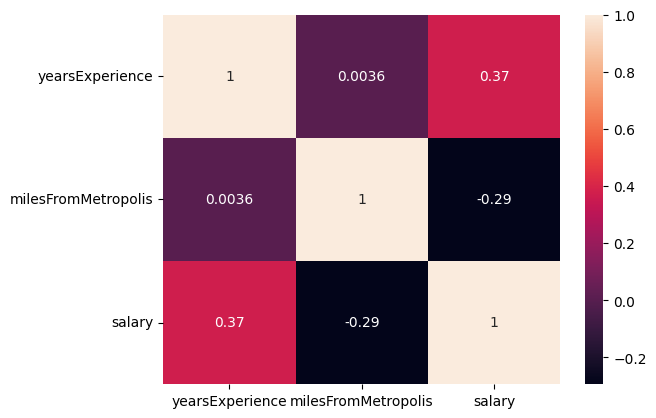

In [21]:
# Correlation matrix using pandas
corr = numeric_data.corr()  
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)  
plt.show()  

#### From above correlation matrix:

> 1. YearsExperience and salary are positively correlated

> 2. YearsExperience and milesFromMetropolis have no correlation 

> 3. milesFromMetropolis and salary are weekly negatively correlated

#### Chi-square Test

>  The chi square statistic is commonly used for testing relationships between categorical variables 

In [22]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [23]:
def perform_chi_square_test(var_1, var_2):

    #contigency table 
    contingency_table=pd.crosstab(train_data[var_1], train_data[var_2])

    #observed values
    observed_values=contingency_table.values

    #expected values
    b=chi2_contingency(contingency_table)
    expected_values=b[3]

    #degree of freedom
    no_of_rows=len(contingency_table.iloc[0:,0])
    no_of_columns=len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of freedom: ", degree_f)

    #significance level 5%
    alpha=0.05
    print("Significance level: ", alpha)


    #chi square statistics
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi square statistic: ", chi_square_statistic)

    #critical value
    critical_value = chi2.ppf(q=1-alpha, df=degree_f)
    print("critical value: ", critical_value)


    #p value
    p_value = 1-chi2.cdf(x=chi_square_statistic, df=degree_f)
    print("p value:", p_value)

    if chi_square_statistic>critical_value:
        print("Reject H0, There is relationship between 2 categorical variables")
    else:
        ("Retain H0, There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0, There is relationship between 2 categorical variables")
    else:
        ("Retain H0, There is no relationship between 2 categorical variables")     

In [24]:
# looping on categorical data list and use function for performing chi square test on columns from datasets
for x in categorical_list:
    for i in categorical_list:
        if i !=x:
            print('chi-square test on: ', x, ' ', i, '\n')
            perform_chi_square_test(x,i)
            print('.................................\n')

chi-square test on:  jobType   degree 

Degree of freedom:  28
Significance level:  0.05
chi square statistic:  49153.86411257831
critical value:  41.33713815142739
p value: 0.0
Reject H0, There is relationship between 2 categorical variables
Reject H0, There is relationship between 2 categorical variables
.................................

chi-square test on:  jobType   major 

Degree of freedom:  56
Significance level:  0.05
chi square statistic:  16381.915810303108
critical value:  74.46832415930936
p value: 0.0
Reject H0, There is relationship between 2 categorical variables
Reject H0, There is relationship between 2 categorical variables
.................................

chi-square test on:  jobType   industry 

Degree of freedom:  42
Significance level:  0.05
chi square statistic:  100.30610291761408
critical value:  58.12403768086803
p value: 1.1246299327360987e-06
Reject H0, There is relationship between 2 categorical variables
Reject H0, There is relationship between 2 catego

#### From the above chi2 test:

    > Correlated variables :

      > jobtype and degree

      > jobtype and major
      
      > degree and major

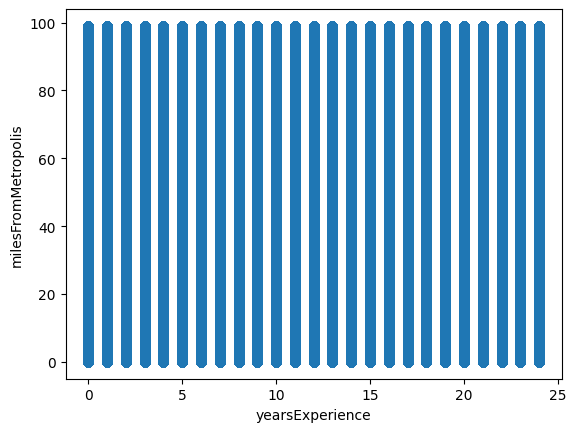

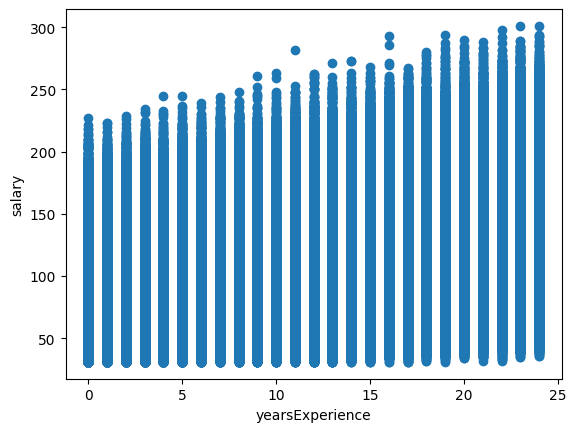

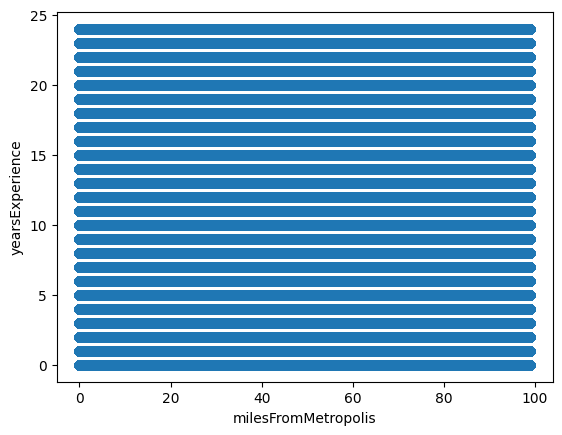

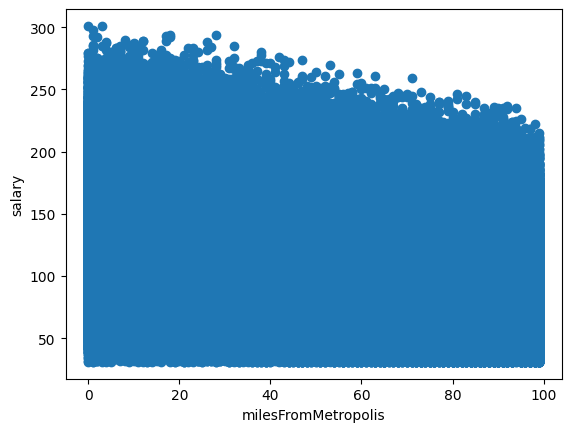

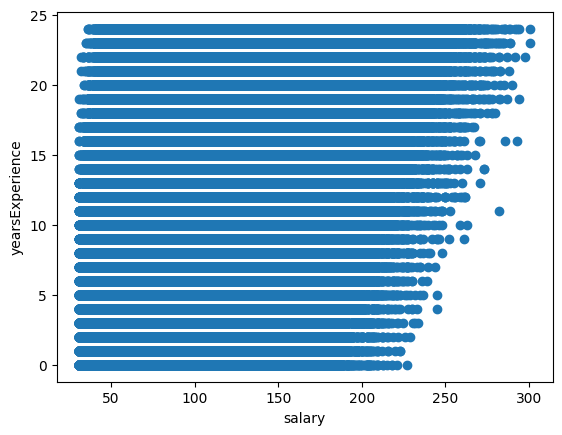

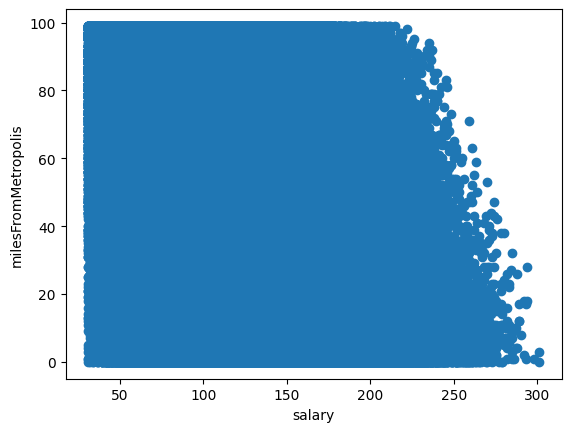

In [25]:
# scatter plot using matplotlib 
def plot_scatter(x,y):
    plt.figure()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(train_data[x], train_data[y])
    plt.show()

# loop through the different columns 
for i in numeric_data:
    for j in numeric_data:
        if i != j:
            plot_scatter(i, j)
            

####  From above scatter plot 

> increase in the value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated 

> increase in the value on milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated 

> there is no change in values of yearExperience vs milesFromMetropolis graph.That is there is no correlation between these variables 

array([[<Axes: title={'center': 'yearsExperience'}>,
        <Axes: title={'center': 'milesFromMetropolis'}>],
       [<Axes: title={'center': 'salary'}>, <Axes: >]], dtype=object)

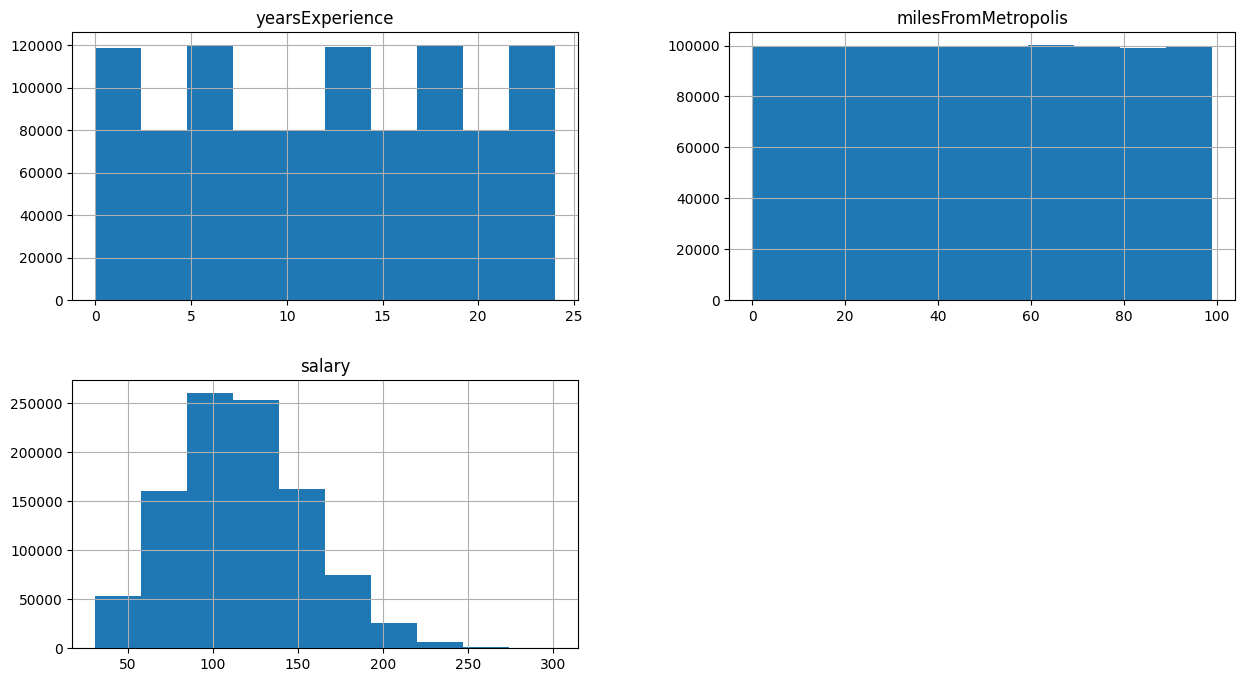

In [26]:
# Histogram

train_data.hist(figsize=(15, 8))

#### From the above Histogram 

> yearsExperience data distribution is symmetric

> milesFromMetropolis data distribution is symmetric

> salary data distribution is symmetric, unimodel 

<Axes: >

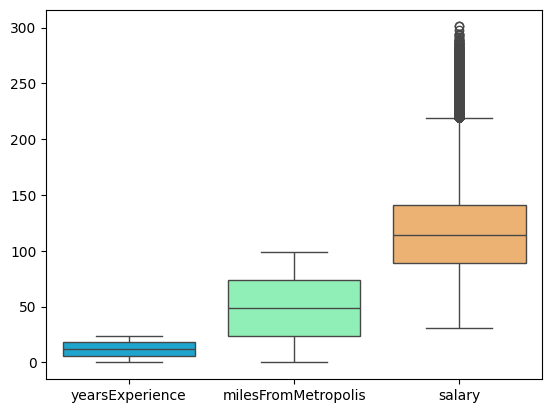

In [27]:
# pairplot
sns.boxplot(numeric_data, palette='rainbow')

<Axes: xlabel='yearsExperience', ylabel='milesFromMetropolis'>

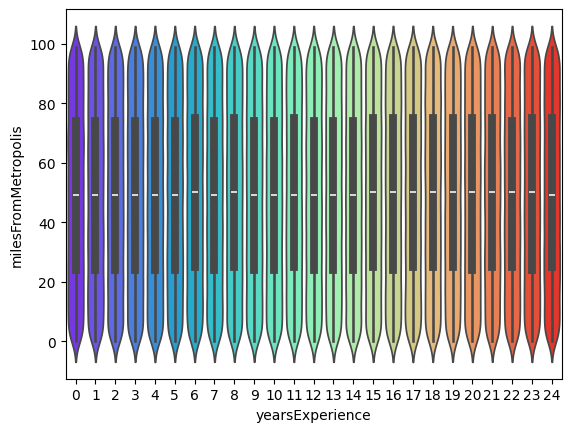

In [28]:
# violin plot 
sns.violinplot(x='yearsExperience', y='milesFromMetropolis', data = train_data, palette='rainbow')

In [29]:
sns.swarmplot(x='yearsExperience', y='salary', data = train_data.iloc[1:50000], palette='rainbow')

KeyboardInterrupt: 

#### Variance inflation factor (VIF)

> The variance inflation factor quantifies the extent of correlation between one predictor and the other predictors a model 

> It is used for diagnosing collinearity / multicollinearity

> Higher values signify that it is difficult to access accurately the contribution of predictors to a model

In [28]:
import statsmodels.api as sm

In [29]:
# creating dataframe for vif using only numerical values
train_vif=numeric_data.drop('salary', axis=1)

# target values 
target=numeric_data['salary']

train_vif.dropna(inplace = True)

In [32]:
train_vif.head()

,yearsExperience,milesFromMetropolis
0,10,83
1,3,73
2,10,38
3,8,17
4,8,16


In [31]:
columns=train_vif.columns.tolist()

In [32]:
vif_data = {
    "Columns": [],
    "VIF": []
}
for index in range(len(columns)):
    x=train_vif.loc[:, train_vif.columns!=columns[index]]
    y=train_vif.loc[:, train_vif.columns==columns[index]]

    model=sm.OLS(y,x)
    results=model.fit()

    r_squared=results.rsquared
    vif=round(1/(1-r_squared),2)

    vif_data["Columns"].append(columns[index])
    vif_data["VIF"].append(vif) 

vif_df=pd.DataFrame(vif_data).sort_values(by="VIF", ascending=False) 

In [35]:
vif_df

,Columns,VIF
0,yearsExperience,2.22
1,milesFromMetropolis,2.22


 > A VIF of 1 indicates that there's no correlation between a given independent variable and any others. VIFs greater than 1 indicate some correlation, but aren't necessarily problematic.

> The general rule of thumb is that a VIF above 5 (or sometimes 10, depending on the field of study) indicates high multicollinearity that might be problematic. 

> yearsExperience and milesFromMetropolis both have collinearity with all the variables

#### ANOVA Test 

> The ANOVA (Analysis of Variance) test is performed to determine if there is a significant difference between the means of three or more groups. 

> It is a statistical method that compares the variation between groups to the variation within groups to determine whether the differences between the group means are significant or simply due to chance.


#### Normality assumption check 

> Before we perform the hypothesis test, we check if the assumption for the one way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variables 

> Homogeneity of variance assumption check 

In [33]:
# perform anova test between two variables 

def perform_anova_test(x,y):
    train_anova = train_data[[x,y]]
    groups = train_anova.groupby(x).count().reset_index()
    print(groups)

    unique_majors = train_anova[x].unique()
    for major in unique_majors:
        stats.probplot(train_anova[train_anova[x]==major][y], dist='norm', plot=plt)
        plt.title("Probability plot -"+ str(major))
        plt.show()

    # calculate ratio of the largest to the smallest sample standard deviation 
    ratio = train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
    print(ratio)

    #create ANOVA backbone table 
    data = [['Between Groups', '','','', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']]
    anova_table = pd.DataFrame(data, columns = ['Source of variation', 'SS', 'df', 'MS', 'F', 'p-value', 'F crit'])  #ss-sum of squares source, ms - mean sum of square source
    anova_table.set_index('Source of variation', inplace = True)

    # calculate SSTR and update anova table 
    x_bar = train_anova[y].mean()
    SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar) **2
    anova_table['SS']['Between Groups'] = SSTR[y].sum()

    # calculate SSF and update anova table
    SSF = (train_anova.groupby(x).count() -1) * train_anova.groupby(x).std()**2
    anova_table['SS']['Within Groups'] = SSF[y].sum()

    # calculate SSTR and update anova table
    SSTR = SSTR[y].sum() + SSF[y].sum()
    anova_table['SS']['Total'] = SSTR 

    # update degree of freedom 
    anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
    anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
    anova_table['df']['Total'] = train_anova.shape[0] - 1

    # calculate MS 
    anova_table['MS'] = anova_table['SS']/anova_table['df']

    # calculate F
    F = anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F

    # p-value
    anova_table['p-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # F critical
    alpha = 0.5

    # possible types "right tailed, left tailed, two tailed"
    tail_hypothesis_type = 'two_tailed'
    if tail_hypothesis_type == 'two_tailed':
        alpha /= 2
    anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

    # final anova table 
    print(anova_table)

    # p-value approach 
    print('approach 1: The p-value approach to hypothesis testing in the decision rule')
    conclusion = "Failed to reject the null hypothesis"
    if anova_table['p-value']['Between Groups'] <= alpha:
        conclusion = 'null hypothesis is rejected '
    print('F-score is ', anova_table['F']['Between Groups']," and p-value is: ", anova_table['p-value']['Between Groups'])
    print(conclusion)

    # The critical value approach
    print("\n.....................................................")
    print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
    conclusion = "Failed to reject the null hypothesis"
    if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
        conclusion = "null hypothesis is rejected"
    print('F score is:', anova_table['F']['Between Groups'], " and critical value is: ", anova_table['F crit']['Between Groups'])
    print(conclusion)

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410


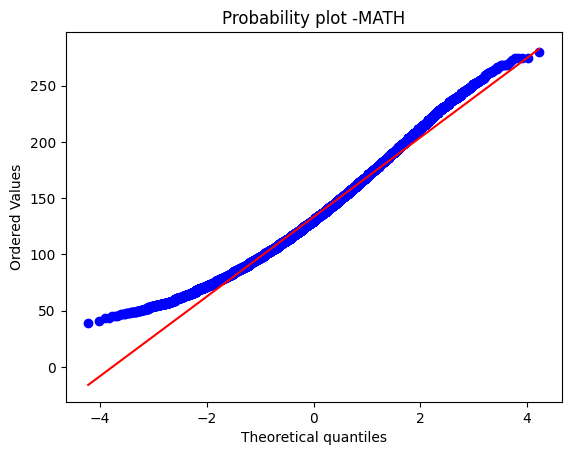

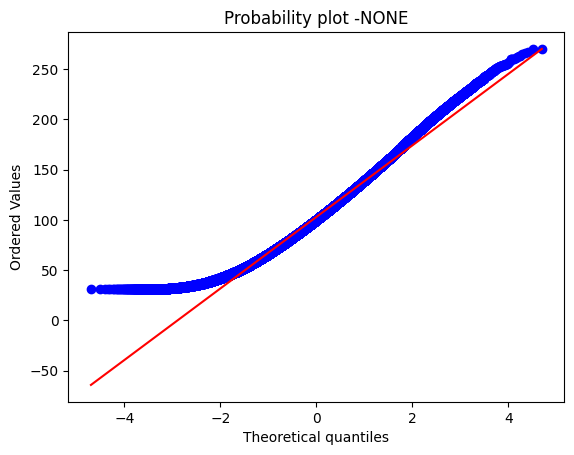

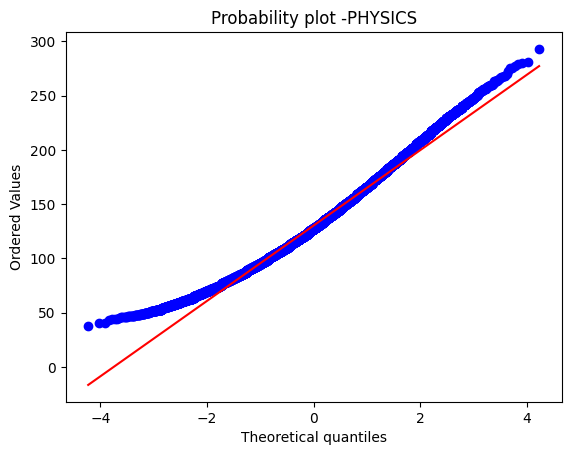

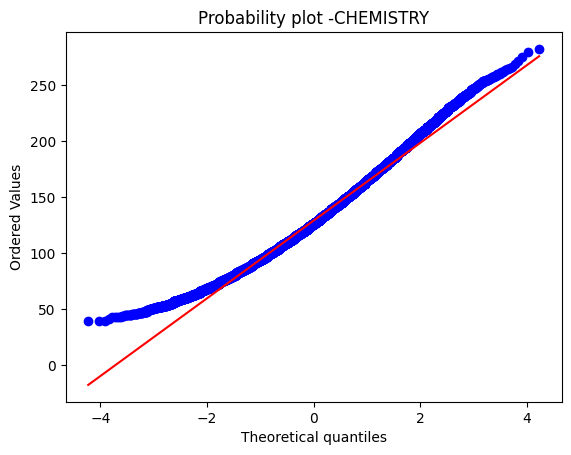

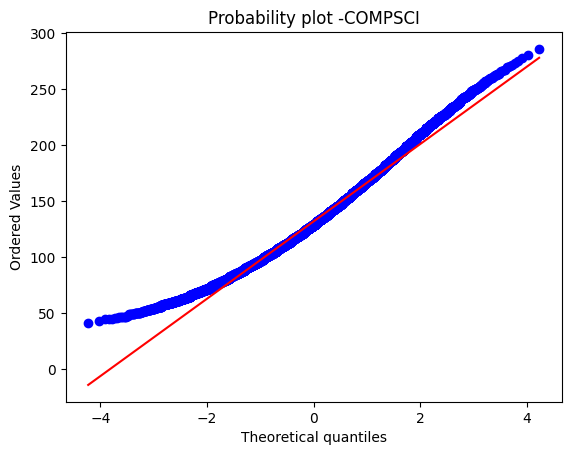

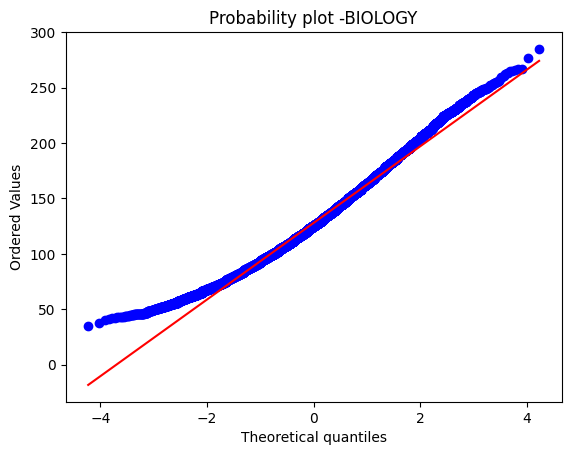

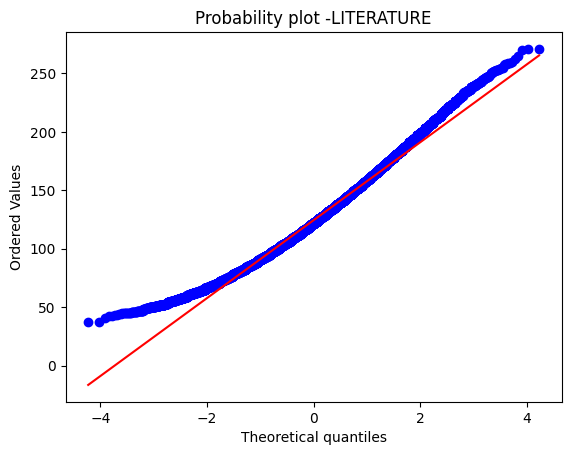

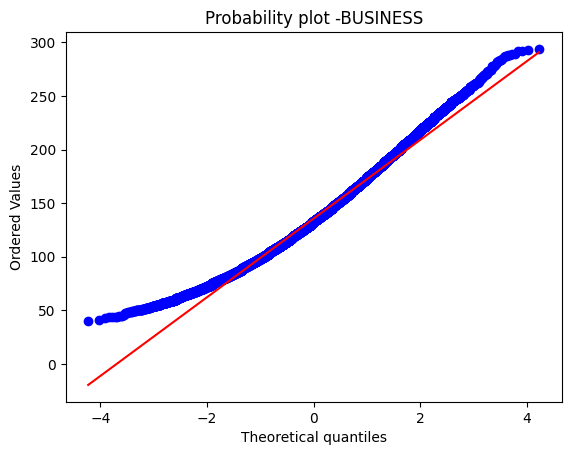

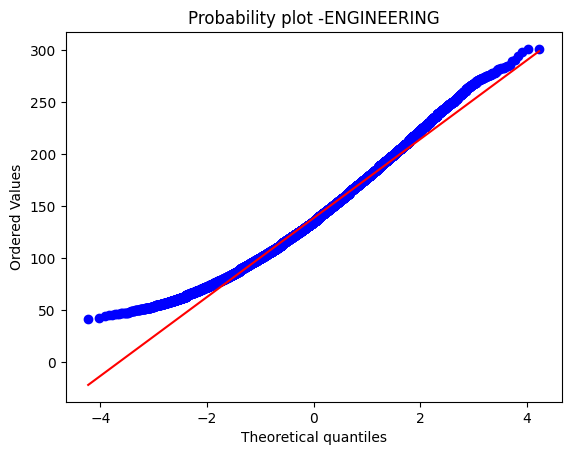

salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    p-value   F crit  
Source of variation                   
Between Groups          0.0  1.27736  
Within Groups                         
Total                                 
approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is  20572.997067846136  and p-value is:  1.1102230246251565e-16
null hypothesis is rejected 

.....................................................
Approach 2: The critical value approach to hypothesis testing in the decision rule
F score is: 20572.997067846136  and critical value

In [37]:
# perform anova test on major and salary
perform_anova_test('major', 'salary')

    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205


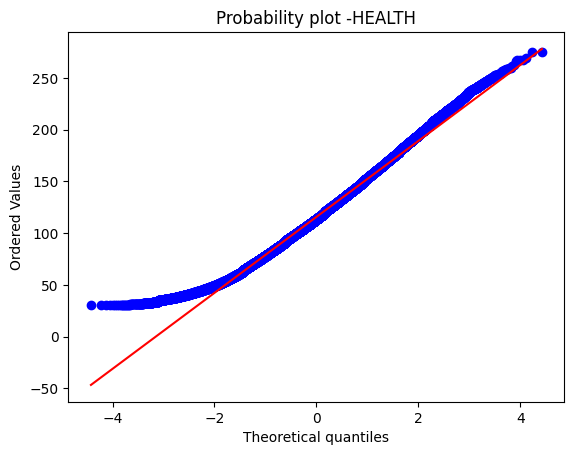

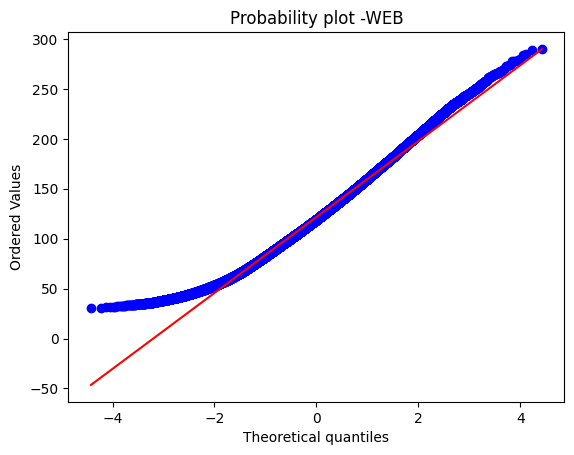

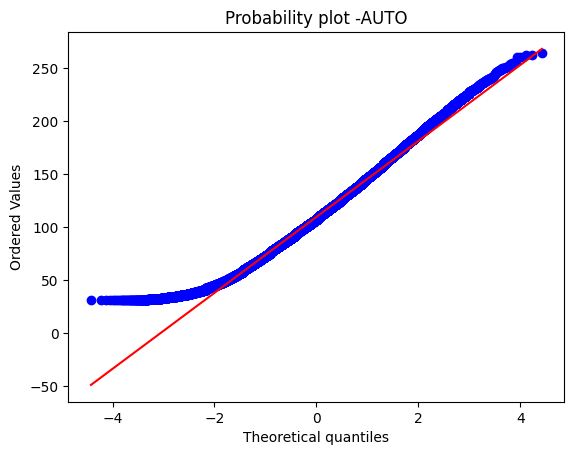

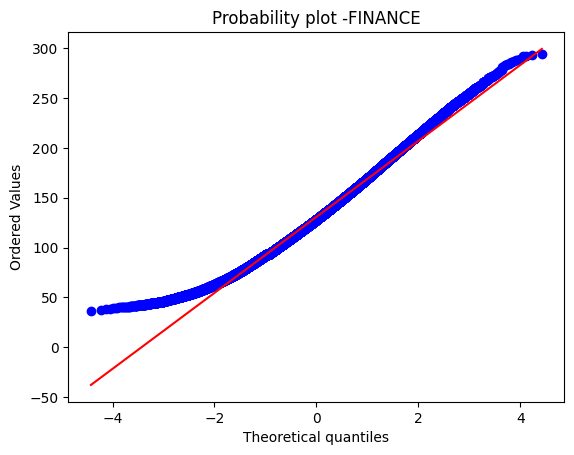

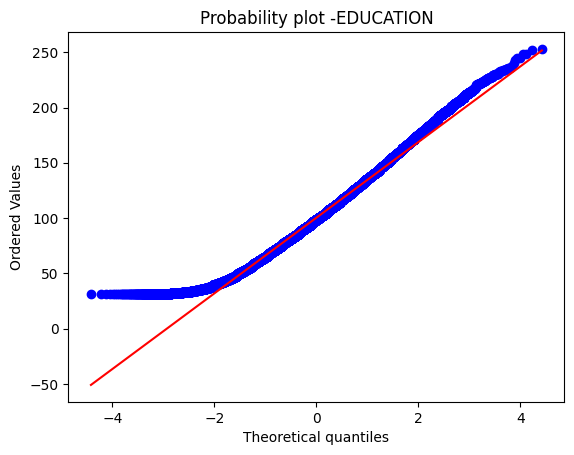

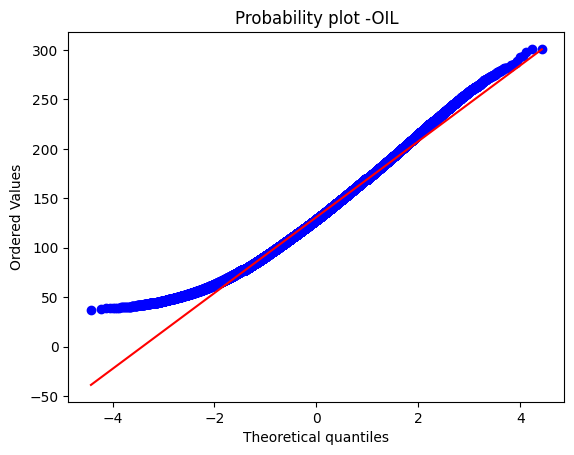

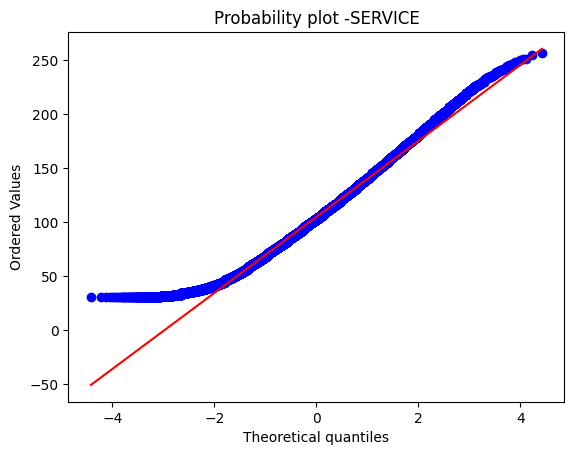

salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    p-value    F crit  
Source of variation                    
Between Groups          0.0  1.306803  
Within Groups                          
Total                                  
approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is  15497.25228748466  and p-value is:  1.1102230246251565e-16
null hypothesis is rejected 

.....................................................
Approach 2: The critical value approach to hypothesis testing in the decision rule
F score is: 15497.25228748466  and critical value is:  1

In [38]:
# perform anova test on industry and salary
perform_anova_test('industry', 'salary')

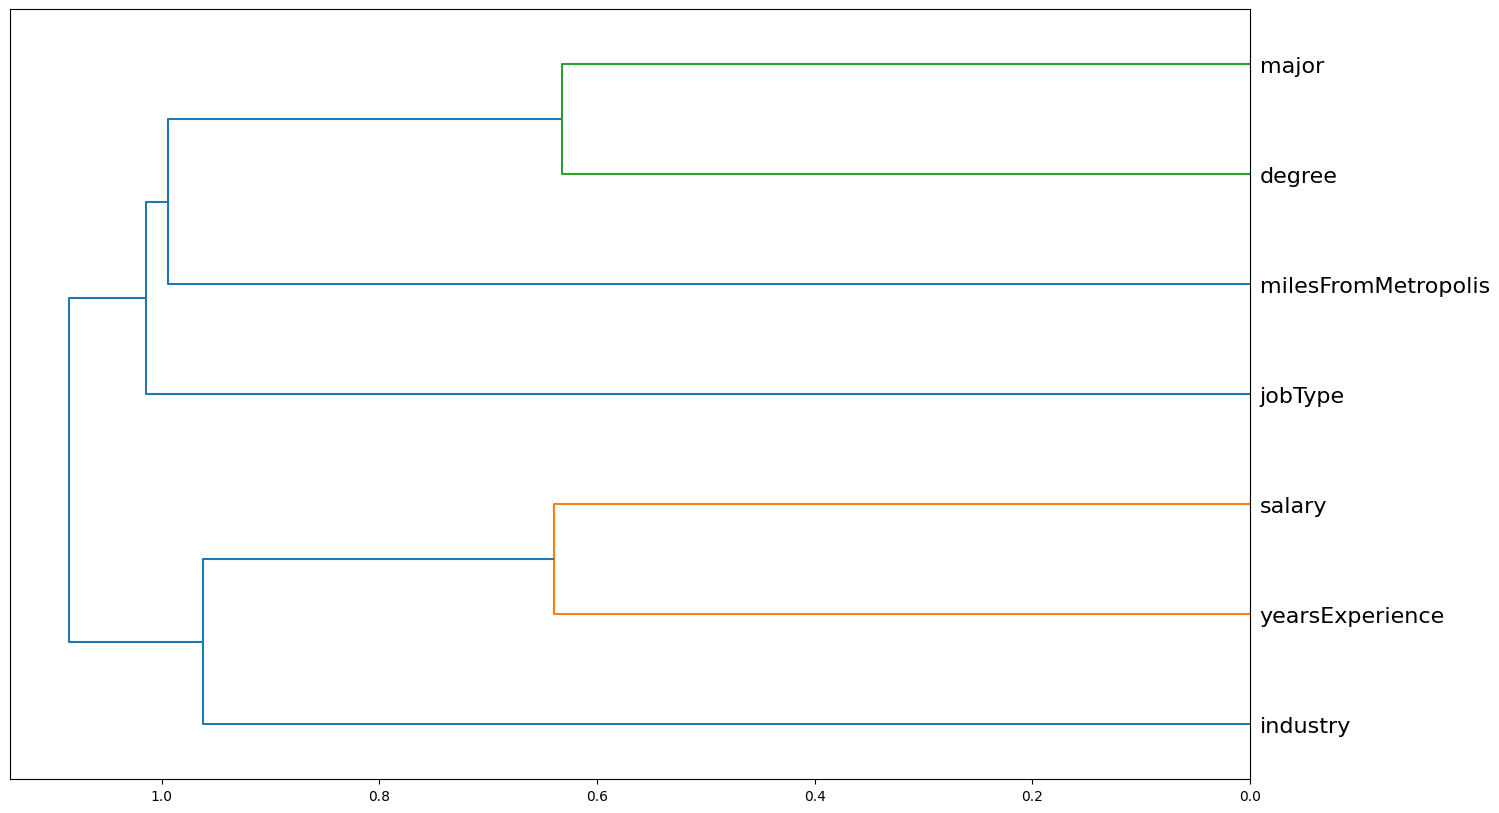

In [39]:
# Plot a dindogram on the column of the dataset 
x=train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(x).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed, method = 'average') 
fig = plt.figure(figsize=(16,10))
dendogram = hc.dendrogram(z, labels=x.columns, orientation='left', leaf_font_size=16)
plt.show()

#### Observations from Dindrogram

> Strongly correlated variables:

    1. major and degree

    2. salary and yearsExperience

#### Scaling

In [34]:
# Helper function for scaling all the numerical data using MinMaxScaler
def scale_data(df, col):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()

    df[col] = scaler.fit_transform(df[col])
    return df

In [35]:
# Making a list of the column names to be scaled
col_train = ['yearsExperience', 'milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train_data, col_train)

#### Modelling

##### One-hot-encoding

> A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value

In [36]:
# Importing OneHotEncoder for encoding the categorical data 
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

# class for containing all functionality required for OneHotEncoding
class OneHotEncoder(SklearnOneHotEncoder):

    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    # helper function to fit data 
    def fit(self, x, **kwargs):
        out = super().fit(x)
        self.fit_flag = True
        return out

    # helper function to transform data
    def transform(self, x, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(x)
        new_columns = self.get_new_columns(x=x)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index = x.index)
        return d_out

    # helper function to fit and transform data
    def get_new_columns(self, x):
        new_columns = []
        for i, column in enumerate(x.columns):
            j=0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}{self.categories_[i][j]}')
                j += 1
        return new_columns

In [37]:
# split the labels and the target
train_x = train_data.drop(['salary', 'yearsExperience', 'milesFromMetropolis'], axis=1)
train_y = train_data['salary']

In [44]:
train_x.head()

,jobType,degree,major,industry
0,CFO,MASTERS,MATH,HEALTH
1,CEO,HIGH_SCHOOL,NONE,WEB
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [45]:
train_y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [38]:
# passing features dataframe for one hot encoding process
encoder = OneHotEncoder()
train_x = encoder.fit_transform(train_x)
train_x = train_x.join(train_data['yearsExperience'])
train_x = train_x.join(train_data['milesFromMetropolis'])
train_x.head()

,jobTypeCEO,jobTypeCFO,jobTypeCTO,jobTypeJANITOR,jobTypeJUNIOR,jobTypeMANAGER,jobTypeSENIOR,jobTypeVICE_PRESIDENT,degreeBACHELORS,degreeDOCTORAL,...,majorPHYSICS,industryAUTO,industryEDUCATION,industryFINANCE,industryHEALTH,industryOIL,industrySERVICE,industryWEB,yearsExperience,milesFromMetropolis
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.838384
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.737374
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.383838
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.171717
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.161616


In [39]:
# importing sklearn library for splitting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2)

In [40]:
# importing necessary libraries for getting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE
def rmse(x, y):
    return math.sqrt(((x-y)**2).mean())

# Function for calculating all the relevant metrics
def print_score(m):
    res = [rmse(m.predict(x_train), y_train), rmse(m.predict(x_test), y_test),
           m.score(x_train, y_train), m.score(x_test, y_test),
           median_absolute_error(m.predict(x_train), y_train), median_absolute_error(m.predict(x_test), y_test),
           metrics.mean_absolute_error(m.predict(train_x), train_y), metrics.mean_absolute_error(m.predict(x_test), y_test),
    ]

    print('RMSE-Train:' + str(res[0]) + '\nRMSE-Test:' + str(res[1]) + '\nScore-Train:' + str(res[2]) + '\nScore-Test:' + str(res[3])
     + '\nMedAE-Train:' + str(res[4]) + '\nMedAL-Test:' + str(res[5]) + '\nMeanAE-Train:' + str(res[6]) + '\nMeanAE-Test:' + str(res[7]), '\n')

In [41]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):

    # creating dataframe for feature name and feature importance 
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)

    # grouping all data and sorting in descending order 
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) *.25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

#### Linear Regression

RMSE-Train:19.62892995461336
RMSE-Test:19.619135717332792
Score-Train:0.7402094232848577
Score-Test:0.7405966823651393
MedAE-Train:13.766292572021484
MedAL-Test:13.762744903564453
MeanAE-Train:15.870200978710443
MeanAE-Test:15.853131071393468 

CPU times: total: 1.47 s
Wall time: 2.71 s


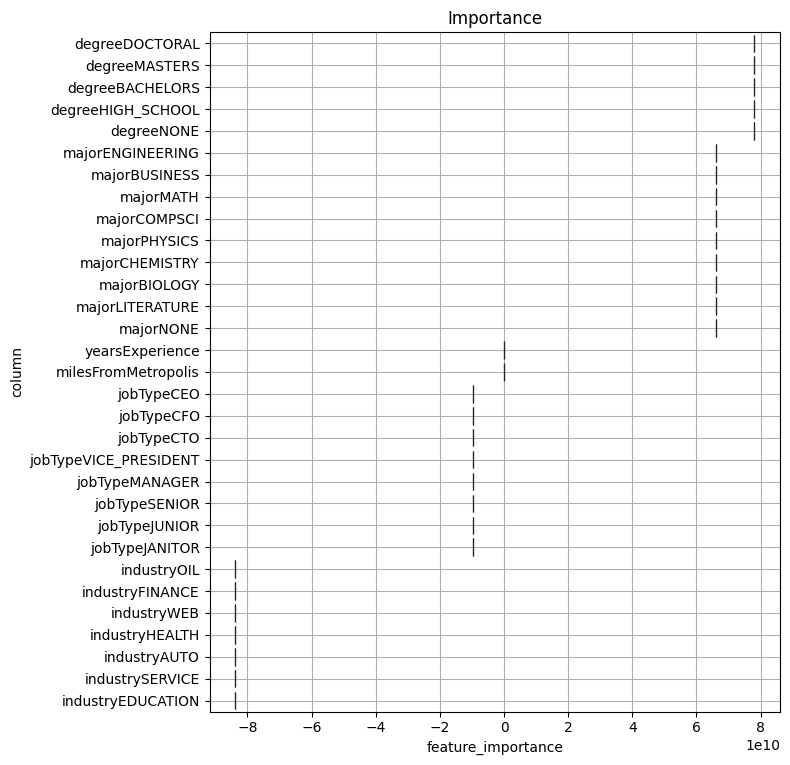

In [50]:
%%time
# fit a Linear Regression model to the train dataset

# Import linear regression
from sklearn.linear_model import LinearRegression

# Instantiate the model 
lr= LinearRegression()

# Fit the model to the data 
lr.fit(x_train, y_train)

# print the score of the model 
print_score(lr)

# visualizing the importance of features
fig, ax = visualize_importance(lr.coef_, train_x)

#### Random forest Regressor

RMSE-Train:20.014129587612388
RMSE-Test:20.613724213860653
Score-Train:0.7299130762246796
Score-Test:0.7136292175763083
MedAE-Train:13.099999999999994
MedAL-Test:13.935000000000002
MeanAE-Train:15.9388300841969
MeanAE-Test:16.464482505415685 

CPU times: total: 58.7 s
Wall time: 1min 41s


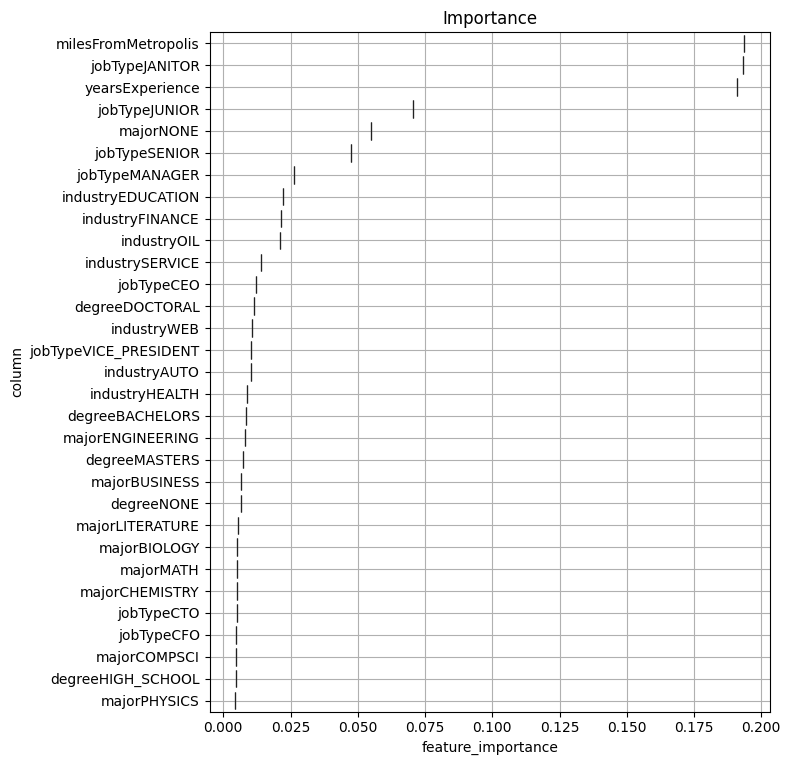

In [51]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor()

# fit the model to the data
rf.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(rf)

# visualizing the importance of features
fig, ax = visualize_importance(rf.feature_importances_, train_x.iloc[1:50000])

#### KNeighbors Regressor

> KNN regressor is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighborhood. The size of the neighborhood needs to be set by the analyst or can be choosen using cross-validation to select the size that misnimises hte mean-squared error

In [52]:
%%time
# fit a K-Neighbor Regressor model to the train dataset

# Import K-NeighborRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
knnr = KNeighborsRegressor()

# fit the model
knnr.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print the score of the model
print_score(knnr)


RMSE-Train:21.31181424182246
RMSE-Test:21.56306497088946
Score-Train:0.6937536031251967
Score-Test:0.6866449009245827
MedAE-Train:14.0
MedAL-Test:14.200000000000003
MeanAE-Train:16.8524357725142
MeanAE-Test:17.023369254673952 

CPU times: total: 10min 37s
Wall time: 5min 36s


#### Gradient Boosting Regressor

> Gradient boosting algorithm is generally used when we want to decrease the Bias error. it builds an additive model is a forward stage-wise fashion, it allows for the optimization of arbitrary differentiate loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function

RMSE-Train:19.438493352154108
RMSE-Test:19.46774671650587
Score-Train:0.7452258599852299
Score-Test:0.7445845537060698
MedAE-Train:13.646048085592057
MedAL-Test:13.633530325001104
MeanAE-Train:15.700052519221114
MeanAE-Test:15.710450415826992 

CPU times: total: 5.42 s
Wall time: 13.7 s


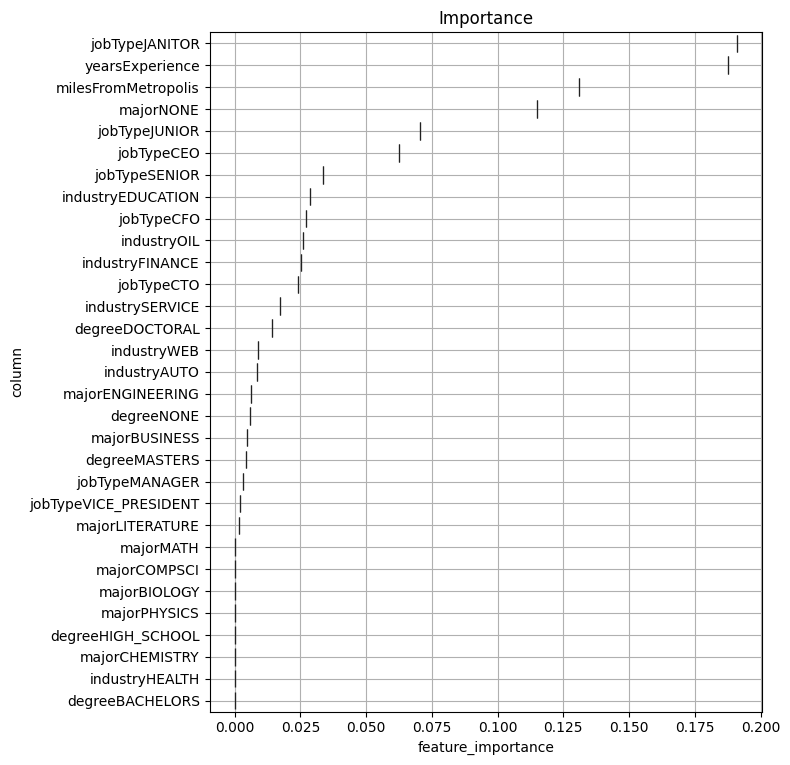

In [53]:
%%time
# fit a Gradient Boosting Regressor model to the train dataset

# Import K-NeighborRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr = GradientBoostingRegressor()

# fit the model
gbr.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print the score of the model
print_score(gbr)


# visualizing the importance of features
fig, ax = visualize_importance(gbr.feature_importances_, train_x.iloc[1:50000])


#### DecisionTree Regressor 

> Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incremently developed. The final result is a tree with decision nodes and leaf nodes

RMSE-Train:26.88944477412849
RMSE-Test:27.804522229834536
Score-Train:0.5124784550873636
Score-Test:0.4789892825128681
MedAE-Train:16.0
MedAL-Test:17.0
MeanAE-Train:20.572340545684682
MeanAE-Test:21.639566103620542 

CPU times: total: 812 ms
Wall time: 2.9 s


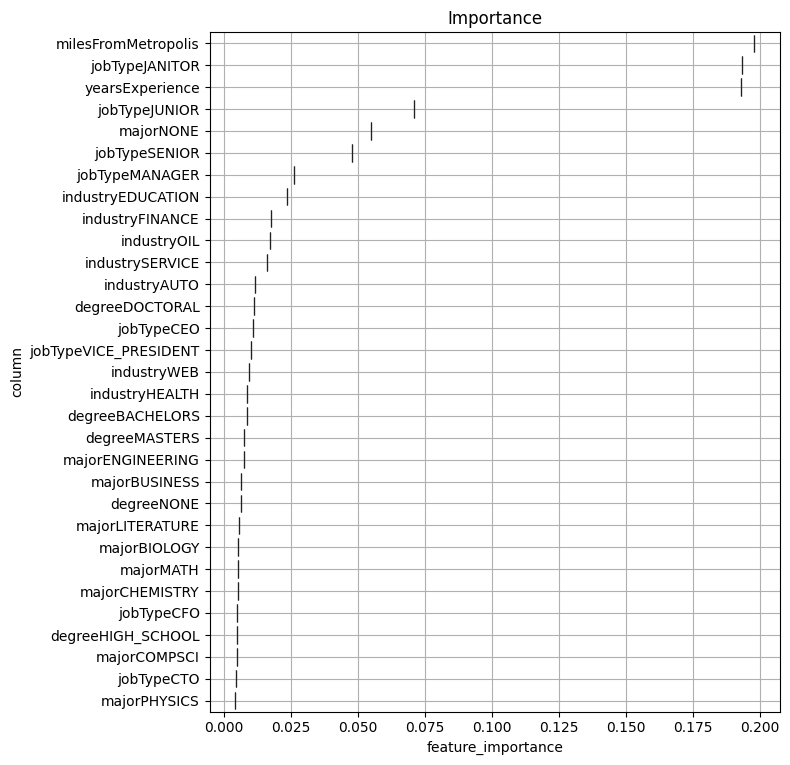

In [54]:
%%time
# fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
dtr = DecisionTreeRegressor()

# fit the model
dtr.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print the score of the model
print_score(dtr)

# visualizing the importance of features
fig, ax = visualize_importance(dtr.feature_importances_, train_x.iloc[1:50000])

#### AdaBoost Regressor

An AdaBoostRegressor is meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train:25.235443885598123
RMSE-Test:25.25100312908615
Score-Train:0.5706098872122911
Score-Test:0.5702923804160974
MedAE-Train:19.34111704853231
MedAL-Test:19.367216604576896
MeanAE-Train:21.010429083243242
MeanAE-Test:21.03229181267731 

CPU times: total: 15 s
Wall time: 38 s


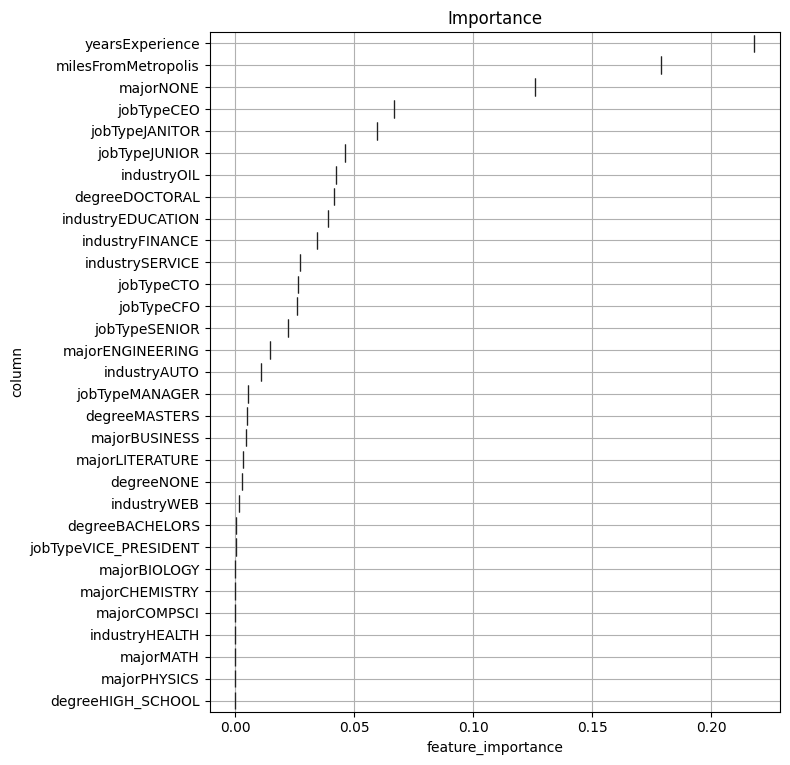

In [55]:
%%time
# fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
abr = AdaBoostRegressor()

# fit the model
abr.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print the score of the model
print_score(abr)

# visualizing the importance of features
fig, ax = visualize_importance(abr.feature_importances_, train_x.iloc[1:50000])

#### XGB Regressor

> XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model.
Ensemble learning offers a systematic solution to combine the predictive prower of multiple learners. The resultant is a single model which gives the aggregated output from several models

In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


RMSE-Train:19.32079775575984
RMSE-Test:19.473939133204205
Score-Train:0.7483017172831138
Score-Test:0.7444220397339876
MedAE-Train:13.449455261230469
MedAL-Test:13.530982971191406
MeanAE-Train:15.60972931539657
MeanAE-Test:15.70057488117808 

CPU times: total: 16.4 s
Wall time: 3.29 s


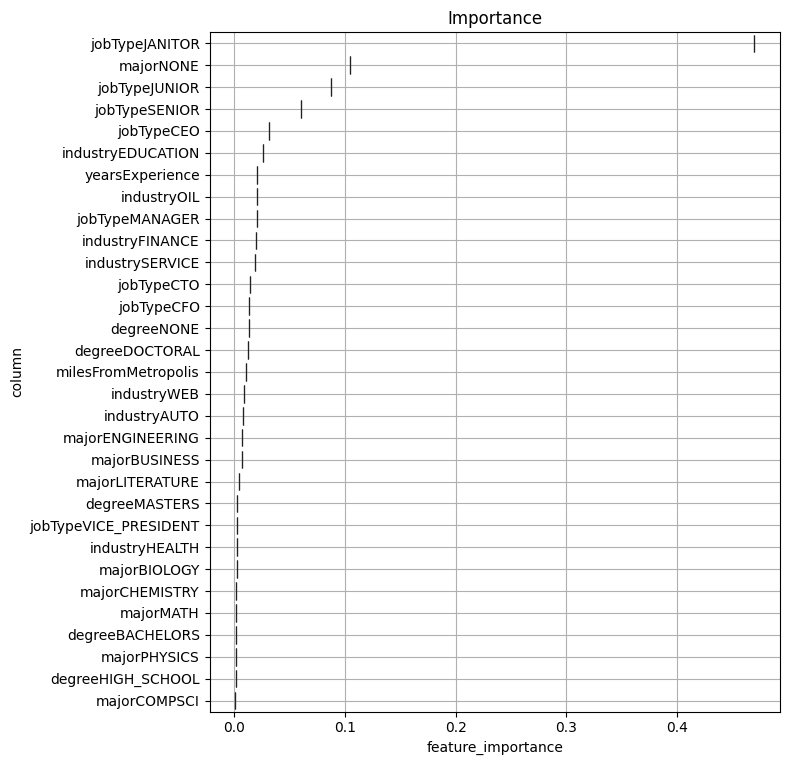

In [57]:
%%time
# fit a XGBoost Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()

# fit the model
xgbr.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print the score of the model
print_score(xgbr)

# visualizing the importance of features
fig, ax = visualize_importance(xgbr.feature_importances_, train_x.iloc[1:50000])

#### Light Gradient Boosted Machine

> Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks

In [58]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 49999, number of used features: 31
[LightGBM] [Info] Start training from score 115.962179
RMSE-Train:19.05122754381211
RMSE-Test:19.10342027528501
Score-Train:0.7552762764967093
Score-Test:0.7540549740095986
MedAE-Train:13.440385032931601
MedAL-Test:13.438843171291602
MeanAE-Train:15.450754860134067
MeanAE-Test:15.468426332408036 

CPU times: total: 17.3 s
Wall time: 9.25 s


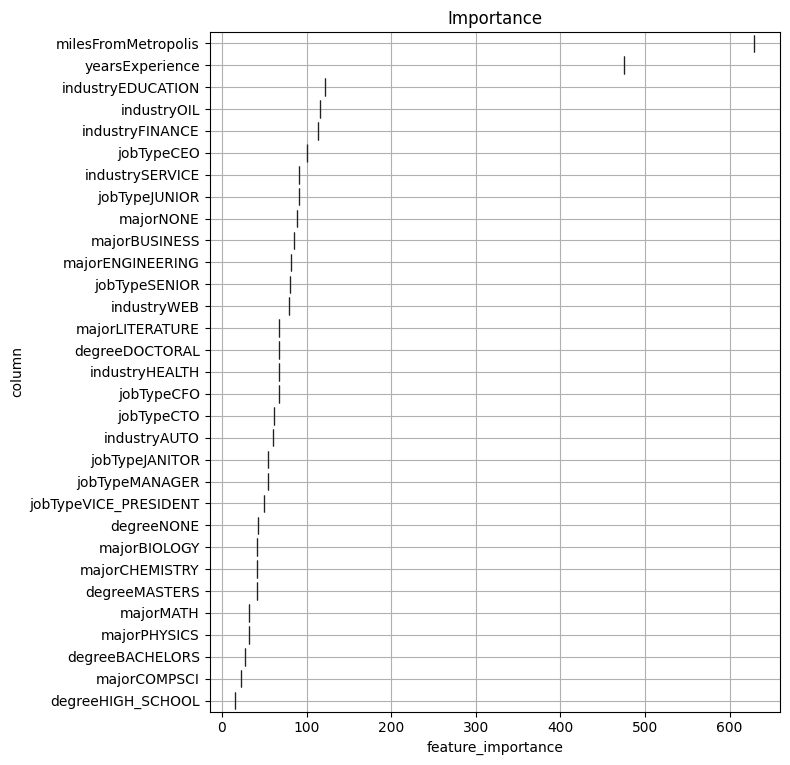

In [59]:
%%time
# fit a lightgbm Regressor model to the train dataset

# Import lightgbm
import lightgbm as lgbm

# Instantiate the model
lgbmr = lgbm.LGBMRegressor()

# fit the model
lgbmr.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print the score of the model
print_score(lgbmr)

# visualizing the importance of features
fig, ax = visualize_importance(lgbmr.feature_importances_, train_x.iloc[1:50000])

#### comparing all the models based on metric

In [42]:
def compare_models(models, names, x_train, y_train, x_test, y_test):
    # the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split

    # create now the list with objects
    data = {'Metric':['rmse', 'MedAE', 'MAE', 'R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
        return math.sqrt(((x-y)**2).mean())
    
    for(model, name) in zip(models, names):
        y_pred = model.predict(x_test) #then predict on the set
        res = [rmse(model.predict(x_train), y_train), rmse(model.predict(x_test), y_test),
               metrics.median_absolute_error(model.predict(x_train), y_train), metrics.median_absolute_error(model.predict(x_test), y_test),
               metrics.mean_absolute_error(model.predict(x_train), y_train), metrics.mean_absolute_error(model.predict(x_test), y_test),
               metrics.r2_score(model.predict(x_train), y_train),metrics.r2_score(model.predict(x_test), y_test)]
        df_train[name] = [res[0], res[2], res[4], res[6]]
        df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train, df_test

In [43]:
# list of models object
# list of models name
models = [lr, dtr, rf, knnr, gbr, xgbr, abr]
names = ['lr', 'Dtree', 'Forest', 'knn', 'GBR', 'Xboost', 'AdaBoost']
comp_model_train, comp_model_test = compare_models(models, names, x_train, y_train, x_test, y_test)

NameError: name 'lr' is not defined

#### RMSE of all model on train and test data 

In [62]:
# printing rmse comparison of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metric        lr      Dtree    Forest        knn        GBR     Xboost  \
0   rmse  19.62893  26.889445  20.01413  21.311814  19.438493  19.320798   

    AdaBoost  
0  25.235444  


  Metric         lr      Dtree     Forest        knn        GBR     Xboost  \
0   rmse  19.619136  27.804522  20.613724  21.563065  19.467747  19.473939   

    AdaBoost  
0  25.251003  


#### All metrics on train and test data 

In [63]:
# printing comparison of model on train and test data
print("Results on Test data")
comp_model_test

Results on Test data


,Metric,lr,Dtree,Forest,knn,GBR,Xboost,AdaBoost
0,rmse,19.619136,27.804522,20.613724,21.563065,19.467747,19.473939,25.251003
1,MedAE,13.762745,17.000000,13.935000,14.200000,13.633530,13.530983,19.367217
2,MAE,15.853131,21.639566,16.464483,17.023369,15.710450,15.700575,21.032292
3,R-squared,0.649079,0.489503,0.629129,0.577739,0.605747,0.667447,0.170027


#### Hyperparameter Tunning

> A hypermeter is a parameter whose value is set before the learning process begin

> Hyperparameters tuning is crucial as they control the overall behaviour of a machine learning model

> Every machine learning models will have different hyperparameters that can be set

#### RamdomizedSearchCV

> RamdomizedSearchCV is very useful when we have many parameters to try and the training time is very long

    1. The first step is to write the parameters that we want to consider

    2. From these parameters select the best ones (which are printed in output)

In [44]:
# Helper function to perform hyper parameter tunning with RandomizedSeachCV
def random_search(model, x_train, y_train, param_grid):
    from sklearn.model_selection import RandomizedSearchCV

    # Random search of parameters, using 3 fold cross validation
    # search across 100 different combination, and use all available cores
    random = RandomizedSearchCV(estimator=model, param_distributions= param_grid, n_iter=20, cv = 3, verbose = 2, random_state= 42, n_jobs=-1)

    # fit the random search model
    random.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])
    print(random.best_params_)

In [65]:
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# create parameters dict for tunning
rf_para_grid = {'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
                'max_features' : ['auto', 'sqrt'],
                'max_depth' : np.linspace(1, 32, 32, endpoint = True).astype(int),
                'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True), 
                'bootstrap' : [True, False]}

# passing the data for hyper parameter tunning with RamdomizedSearchCV
random_search(RandomForestRegressor(), x_train, y_train, param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 16, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': True}


In [66]:
# import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# create parameters dict for tunning
GBR_para_grid = {'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
                'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                'max_depth' : np.linspace(1, 32, 32, endpoint = True).astype(int),
                'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)}

# passing the data for hyper parameter tunning with RamdomizedSearchCV
random_search(GradientBoostingRegressor(), x_train, y_train, param_grid=GBR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8, 'learning_rate': 0.25}


In [67]:
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# create parameters dict for tunning
DTR_para_grid ={'splitter' : ['best', 'random'],
                'max_depth' : np.linspace(1, 32, 32, endpoint = True).astype(int),
                'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True), 
                'min_weight_fraction_leaf' : [0.1, 0.2, 0.5, 0.9],
                'max_features' : ['auto', 'log2', 'sqrt', None]}

# passing the data for hyper parameter tunning with RamdomizedSearchCV
random_search(DecisionTreeRegressor(), x_train, y_train, param_grid=DTR_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20}


In [68]:
# import XGBRegressor
from xgboost import XGBRegressor

# create parameters dict for tunning
XGB_para_grid = {'learning_rate' : [0.05, 0.10, 0.15],
                'max_depth' : range(3, 10, 2), 
                'min_child_weight' : range(1, 6, 2),
                'gamma' : [0.0, 0.1, 0.2],
                'colsample_bytree' : [0.3, 0.4]}

# passing the data for hyper parameter tunning with RamdomizedSearchCV
random_search(XGBRegressor(), x_train, y_train, param_grid=XGB_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


#### Using the best parameters and training the models

CPU times: total: 0 ns
Wall time: 0 ns
RMSE-Train:35.41591725879283
RMSE-Test:35.42911433032636
Score-Train:0.15427896579430944
Score-Test:0.15406620589211262
MedAE-Train:24.39630242913232
MedAL-Test:24.39618935490077
MeanAE-Train:28.416225497982108
MeanAE-Test:28.42480198954772 



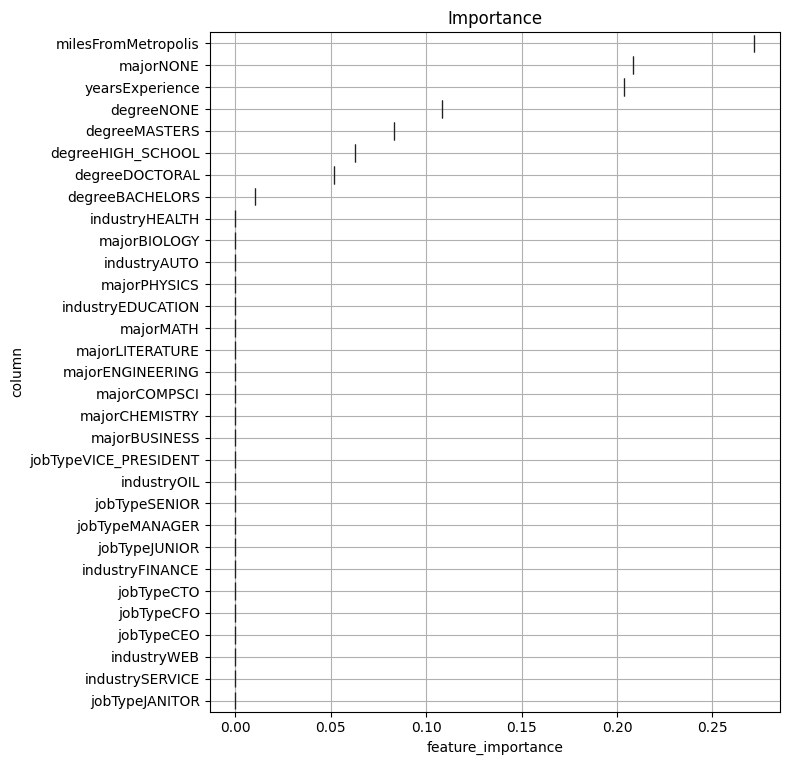

In [69]:
%time
# fit a random forest regressor model to the train dataset

# instantiate the model
RF = RandomForestRegressor(**{'n_estimators': 16, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': True})

# fit the model to the data 
RF.fit(x_train.iloc[1:10000], y_train.iloc[1:10000])

# print score of the model
print_score(RF)

# visualizing the importance of features
fig, ax = visualize_importance(RF.feature_importances_, train_x.iloc[1:10000])

CPU times: total: 0 ns
Wall time: 0 ns
RMSE-Train:19.161275910581836
RMSE-Test:19.205728909938593
Score-Train:0.752440844498763
Score-Test:0.7514135958720977
MedAE-Train:13.50316384077248
MedAL-Test:13.487185498310232
MeanAE-Train:15.538313702063386
MeanAE-Test:15.553168715579897 



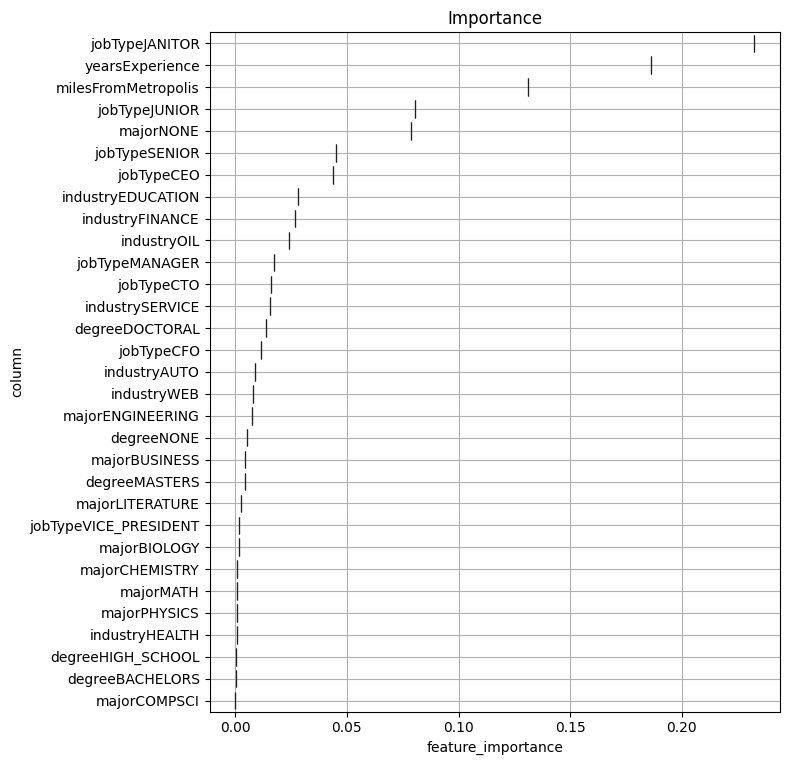

In [70]:
%time
# fit a GradientBoostingRegressor model to the train dataset

# instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators': 64, 'min_samples_split': 0.1, 'max_depth': 8, 'learning_rate': 0.25})

# fit the model to the data 
GBR.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(GBR)

# visualizing the importance of features
fig, ax = visualize_importance(GBR.feature_importances_, train_x.iloc[1:50000])

CPU times: total: 0 ns
Wall time: 0 ns
RMSE-Train:35.68027658839043
RMSE-Test:35.69531826014848
Score-Train:0.14160620793926182
Score-Test:0.14130625331174107
MedAE-Train:24.512220309810658
MedAL-Test:24.512220309810658
MeanAE-Train:28.667191441955378
MeanAE-Test:28.67783393399311 



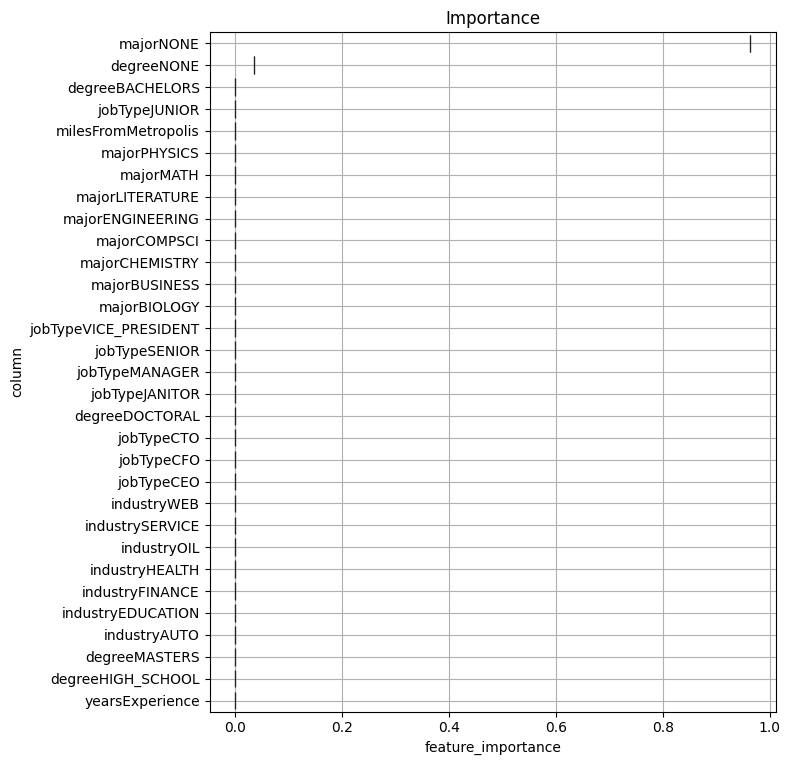

In [71]:
%time
# fit a DecisionTreeRegressor model to the train dataset

# instantiate the model
DTR = DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20})

# fit the model to the data 
DTR.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(DTR)

# visualizing the importance of features
fig, ax = visualize_importance(DTR.feature_importances_, train_x.iloc[1:50000])

CPU times: total: 0 ns
Wall time: 0 ns
RMSE-Train:21.923978515752548
RMSE-Test:22.712361256023424
Score-Train:0.6759075759305325
Score-Test:0.652351501575329
MedAE-Train:13.675743103027344
MedAL-Test:14.789390563964844
MeanAE-Train:16.99455257249608
MeanAE-Test:17.90270990788814 



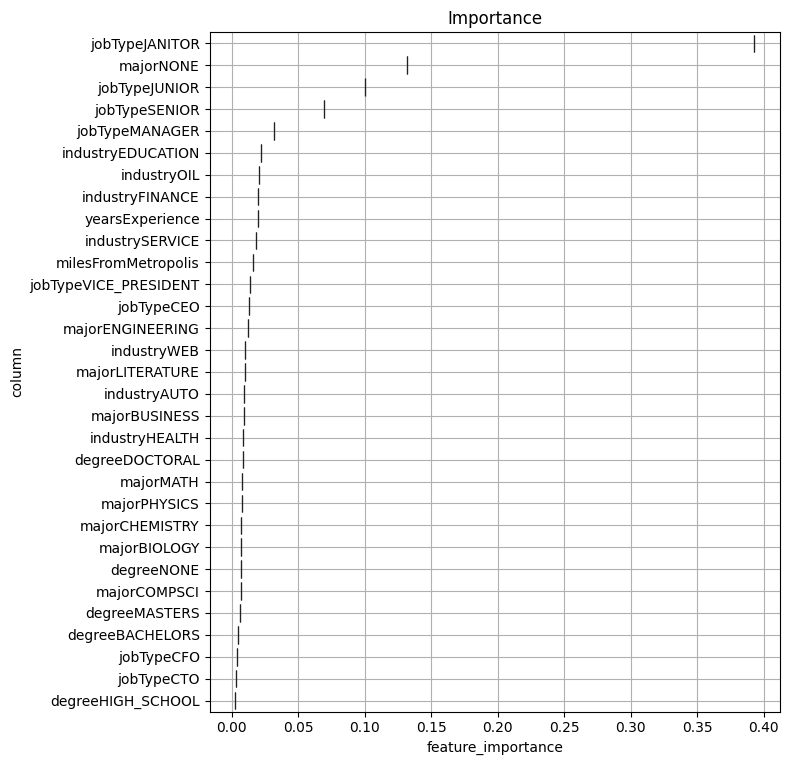

In [72]:
%time
# fit a XGBRegressor model to the train dataset

# instantiate the model
XGBR = XGBRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20})

# fit the model to the data 
XGBR.fit(x_train.iloc[1:50000], y_train.iloc[1:50000])

# print score of the model
print_score(XGBR)

# visualizing the importance of features
fig, ax = visualize_importance(XGBR.feature_importances_, train_x.iloc[1:50000])

#### Comparing the metrics for tuned models

In [45]:
models = [DTR, RF, GBR, XGBR]
names = ['DTree', 'RForest', 'GBR', 'XGBR']
comp_model_train, comp_model_test = compare_models(models, names, x_train, y_train, x_test, y_test)

NameError: name 'DTR' is not defined

In [74]:
print('Metrics on train data')
comp_model_train

Metrics on train data


,Metric,DTree,RForest,GBR,XGBR
0,rmse,35.680277,35.415917,19.161276,21.923979
1,MedAE,24.512220,24.396302,13.503164,13.675743
2,MAE,28.664531,28.414081,15.534600,16.767513
3,R-squared,-4.851250,-34.493503,0.673458,0.613419


In [75]:
print('Metrics on test data')
comp_model_test

Metrics on test data


,Metric,DTree,RForest,GBR,XGBR
0,rmse,35.695318,35.429114,19.205729,22.712361
1,MedAE,24.512220,24.396189,13.487185,14.789391
2,MAE,28.677834,28.424802,15.553169,17.902710
3,R-squared,-4.860382,-34.526030,0.671223,0.580180


#### Based on these metrics, it appears that the Gradient Boosting Regression (GBR) and XGBoost Regression (XGBR) models perform better than the Decision Tree (DTree) and Random Forest (RForest) models. This is indicated by their lower rmse, MedAE, and MAE scores, as well as their higher R-squared scores.

#### Now working with the test dataset provided

In [53]:
# test data 
test_x = test_data[1:50000]

test_x.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23


In [54]:
# passing the test for scaling 

col_test=['yearsExperience', 'milesFromMetropolis']
test_x = scale_data(test_x, col_test)
test_x.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,0.833333,0.474747
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,0.708333,0.090909
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,0.583333,0.969697
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,0.416667,0.444444
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,0.250000,0.232323


In [55]:
# passing the test dataset for one hot encoding process
encoder = OneHotEncoder()
test_drop = test_x.drop(['jobType', 'degree', 'major', 'industry'], axis=1)
test_x = test_x.drop(['yearsExperience', 'milesFromMetropolis'], axis=1)


In [56]:
test_x = encoder.fit_transform(test_x)

MemoryError: Unable to allocate 18.7 GiB for an array with shape (49999, 50091) and data type float64

In [51]:
test_x.shape

(49999, 50091)

In [52]:
test_x = test_x.join(test_drop['yearsExperience'])

MemoryError: Unable to allocate 18.7 GiB for an array with shape (50092, 49999) and data type float64

In [ ]:
test_x = test_x.join(test_drop['milesFromMetropolis'])
test_x.head()

In [79]:
# perform the prediction on the test dataset
y_predicted = GBR.predict(test_x)
y_predicted

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- companyId
- degree
- industry
- jobId
- jobType
- ...
Feature names seen at fit time, yet now missing:
- degreeBACHELORS
- degreeDOCTORAL
- degreeHIGH_SCHOOL
- degreeMASTERS
- degreeNONE
- ...


In [80]:
# creating a dataframe of predicted results
predictions = pd.DataFrame(y_predicted)

NameError: name 'y_predicted' is not defined

In [81]:
# predicted values in the dataframe
predictions

NameError: name 'predictions' is not defined

#### Business problem

In [82]:
# we take same samples provided by the manager so that we can explain him the difference between the actual salary the person is getting and salary the person should get
sample = train_data.sample(100)

In [85]:
# categorical variables for the sample
train_cat = sample.iloc[:, 0:4]

# encoded the sample 
encoder = OneHotEncoder()
train_x = encoder.fit_transform(train_data)

# processing the sample data 
train = train_x.join(sample.iloc[:, 4:])

# taking those samples whose salary is very less i.e the reason for employee resigning 
sample = train[train['salary']< 60]
sample

# preparing the x and y values 
x_sample = sample.drop('salary', axis=1)
y_sample = sample['salary']

# passing the test data for scaling 
col_test = ['yearsExperience', 'milesFromMetropolis']
sample_x = scale_data(x_sample, col_test)
sample_x

ValueError: columns overlap but no suffix specified: Index(['jobTypeJUNIOR', 'jobTypeMANAGER', 'jobTypeSENIOR',
       'jobTypeVICE_PRESIDENT', 'degreeBACHELORS', 'degreeDOCTORAL',
       'degreeHIGH_SCHOOL', 'degreeMASTERS', 'degreeNONE', 'majorBIOLOGY',
       ...
       'salary286', 'salary287', 'salary288', 'salary289', 'salary290',
       'salary292', 'salary293', 'salary294', 'salary298', 'salary301'],
      dtype='object', length=415)